In [74]:
import numpy as np
import matplotlib.pyplot as plt
import multiprocessing as mp
from matplotlib import animation

### Numerical Solver

In [93]:
"""
Numerical solver for time-stepping method, default x range: [0, 1], y range: [0, 1] default t range: [0, 10]
Boundary conditions: c(x, y = 1; t) = 1 and c(x, y = 0; t) = 0; c(x = 0, y; t) = c(x = 1, y; t), initial
conditions: c(x, y; t = 0) = 0 for 0 ≤ x ≤ 1, 0 ≤ y < 1.
"""

delta_x = 0.025
delta_t = 1e-5
mesh_x = np.linspace(0, 1, int(1 / delta_x))
mesh_t = np.linspace(0, 1, int(1 / delta_t))
n_i = len(mesh_x)
n_k = len(mesh_t)

# create empty matrix to store solution of PDE
c_0 = np.zeros((n_i, n_i))
c_0[:, -1].fill(1)
print(np.shape(c_0))


def diffusion_solver(D=1, dx=delta_x, dt=delta_t, n_i=n_i, c=np.copy(c_0)):

    for j in range(n_i-2):
        j += 1
        for i in range(n_i):

            # boundary conditions
            if i == 0:
                c_ = c[i, j] + dt*D/dx**2 * (c[i+1, j] + c[-2, j] + c[i, j+1] + c[i, j-1] - 4*c[i, j])
            elif i == n_i-1:
                c_ = c[i, j] + dt*D/dx**2 * (c[1, j] + c[i-1, j] + c[i, j+1] + c[i, j-1] - 4 * c[i, j])
            else:
                c_ = c[i, j] + dt*D/dx**2 * (c[i+1, j] + c[i-1, j] + c[i, j+1] + c[i, j-1] - 4*c[i, j])

            c[i, j] = c_

    return c

(40, 40)


### Solve pde

In [88]:
# Create matrix to store solution at every 1000 time points
c_store = np.zeros((int(n_k/100 + 2), n_i, n_i))
c_store[:, -1].fill(1)

if __name__ == '__main__':

    c_copy = np.copy(c_0)
    count = 0
    
    for k in range(n_k):

        c = diffusion_solver(c=np.copy(c_copy))

        c_copy = c

        if k % 100 == 0:
            c_store[count+1, :, :] = c
            print(k, ' time step achieved!')
            count += 1


0  time step achieved!
100  time step achieved!
200  time step achieved!
300  time step achieved!
400  time step achieved!
500  time step achieved!
600  time step achieved!
700  time step achieved!
800  time step achieved!
900  time step achieved!
1000  time step achieved!
1100  time step achieved!
1200  time step achieved!
1300  time step achieved!
1400  time step achieved!
1500  time step achieved!
1600  time step achieved!
1700  time step achieved!
1800  time step achieved!
1900  time step achieved!
2000  time step achieved!
2100  time step achieved!
2200  time step achieved!
2300  time step achieved!
2400  time step achieved!
2500  time step achieved!
2600  time step achieved!
2700  time step achieved!
2800  time step achieved!
2900  time step achieved!
3000  time step achieved!
3100  time step achieved!
3200  time step achieved!
3300  time step achieved!
3400  time step achieved!
3500  time step achieved!
3600  time step achieved!
3700  time step achieved!
3800  time step achieved

### Draw plots

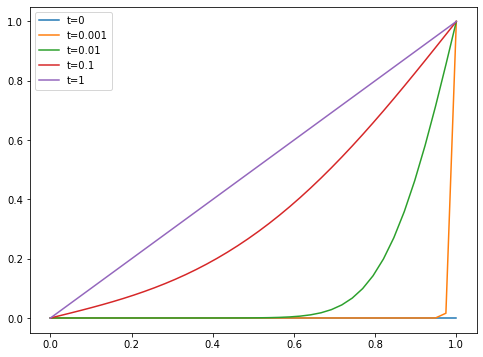

In [89]:
y_plot = np.linspace(0, 1, int(1/delta_x))

plt.rcParams['figure.figsize'] = (8, 6)

fig1, ax = plt.subplots(1)


ax.plot(y_plot, c_store[0, 0, :], label='t=0')
ax.plot(y_plot, c_store[1, 0, :], label='t=0.001')
ax.plot(y_plot, c_store[10, 0, :], label='t=0.01')
ax.plot(y_plot, c_store[100, 0, :], label='t=0.1')
ax.plot(y_plot, c_store[1000, 0, :], label='t=1')

plt.legend()

plt.show()

# plt.plot(mesh_x, c_store[100, 1, :])
# plt.show()

# Animation

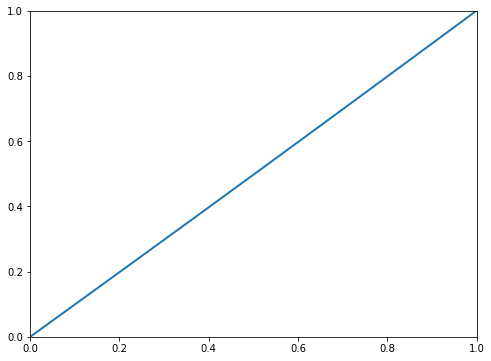

In [97]:
fig_ani = plt.figure()
plt.rcParams['figure.figsize'] = (8, 6)

ax = plt.axes(xlim=(0,1), ylim=(0,1))

line, =ax.plot([], [], lw=2)

def init():
    line.set_data([], [])
    return line, 

def animate(i):
    x = np.linspace(0, 1, 40)
    y = np.reshape(c_store[i, 0, :], newshape=[40])
    line.set_data(x, y)
    return line, 

anim = animation.FuncAnimation(fig_ani, animate, init_func=init, frames=500, interval=200)

anim.save('Diffusion equation.mp4', fps=30)